In [91]:
import requests
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set_style("darkgrid")

In [92]:
import datapane as dp

In [93]:
#game data
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

r = requests.get(url)

json_data = r.json()

elements_df = pd.DataFrame(json_data['elements'])
elements_types_df = pd.DataFrame(json_data['element_types'])
teams_df = pd.DataFrame(json_data['teams'])

In [94]:
json_data.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [95]:
json_data['total_players']

8173493

In [96]:
url = 'https://fantasy.premierleague.com/api/leagues-classic/872868/standings/'

r = requests.get(url)

league = r.json()

df_league = pd.DataFrame(league['standings']['results'])

df_league

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name
0,23277357,0,James Rivers,1,1,1,2024,1065573,Balsamic Vinagre
1,36423051,0,Ted Rosner,2,2,2,1952,260799,Grabban by Debuchy
2,38810568,0,George Baker Baker,3,3,3,1938,3962148,Warnocked Out
3,23483387,2,Pete Stebbing,4,4,4,1913,1591768,Diego Marrastebbo
4,25060316,0,Sam Guest,5,5,5,1881,4032730,lads lads lads
5,24183778,0,Leo Anthias,6,6,6,1877,3962240,OrigiASM
6,38295560,0,A A,7,7,7,1874,4914782,Nanas Squad
7,30449535,7,Robert Shannon,8,8,8,1855,4811871,Abbeville Rovers
8,23258833,9,Luke Betham,9,10,9,1842,1409005,Nanas Squad
9,28025617,0,Henry Turnbull,10,9,10,1841,16866,Turnbull’s Revenge


In [97]:
url = 'https://fantasy.premierleague.com/api/entry/4914782/history/'
r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['current', 'past', 'chips'])

In [98]:
pd.DataFrame(json['past'])

,season_name,total_points,rank
0,2018/19,1824,3862562
1,2019/20,1898,3108475


In [99]:
df_all = pd.DataFrame(columns=['event', 'points', 'total_points', 'rank', 'rank_sort', 'overall_rank',
       'bank', 'value', 'event_transfers', 'event_transfers_cost',
       'points_on_bench', 'player','team_name'])
# get all players data from a league
for i, val in enumerate(df_league.entry):
    url = 'https://fantasy.premierleague.com/api/entry/{}/history/'.format(val)

    r = requests.get(url)

    json = r.json()

    df_temp=pd.DataFrame(json['current'])
    print(val,df_league.iloc[i,2],df_league.iloc[i,8])
    df_temp['player'] = df_league.iloc[i,2]
    df_temp['team_name'] = df_league.iloc[i,8]
    df_all= pd.concat([df_all,df_temp])
    

1065573 James Rivers Balsamic Vinagre
260799 Ted Rosner Grabban by Debuchy
3962148 George Baker Baker Warnocked Out
1591768 Pete Stebbing Diego Marrastebbo
4032730 Sam Guest lads lads lads
3962240 Leo Anthias OrigiASM
4914782 A A Nanas Squad
4811871 Robert Shannon Abbeville Rovers
1409005 Luke Betham Nanas Squad
16866 Henry Turnbull Turnbull’s Revenge
1786332 Nick Sissling Fiddler on the Huth
1416663 Henry Elks Debbie Does Gallas


In [100]:
# cleaning
for col in df_all:
    try:
        df_all[col]=df_all[col].astype(float)
    except:
        pass
    
df_all['player'] = df_all['player'].apply(lambda x: "Alex Andreou" if x == "A A" else x)
df_all['player'] = df_all['player'].apply(lambda x: "Turnbull" if x == "Henry Turnbull" else x)
df_all['player'] = df_all['player'].apply(lambda x: "Elks" if x == "Henry Elks" else x)
df_all['player'] = df_all['player'].apply(lambda x: x.split()[0])

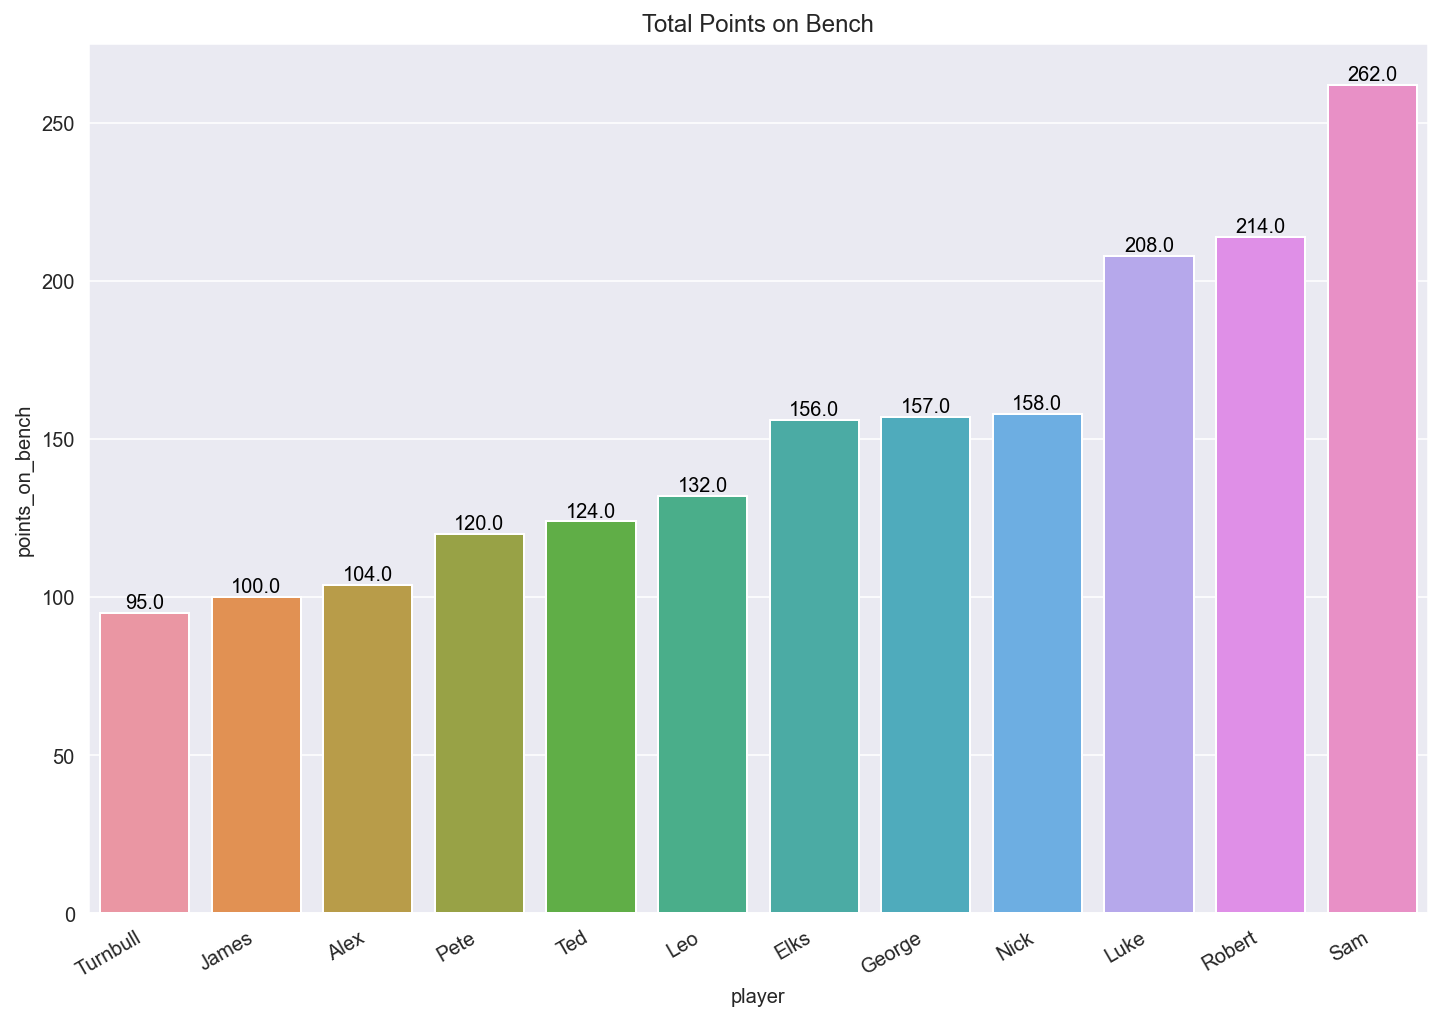

In [101]:
# Total points on Bench
df_temp = df_all.groupby('player').sum()[['points_on_bench']].sort_values('points_on_bench')
plt.figure(figsize=(12,8))
bench_chart=sns.barplot(y=df_temp.points_on_bench,x=df_temp.index)
plt.title("Total Points on Bench")
plt.xticks(rotation=30,ha="right")
for p in bench_chart.patches:
    bench_chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

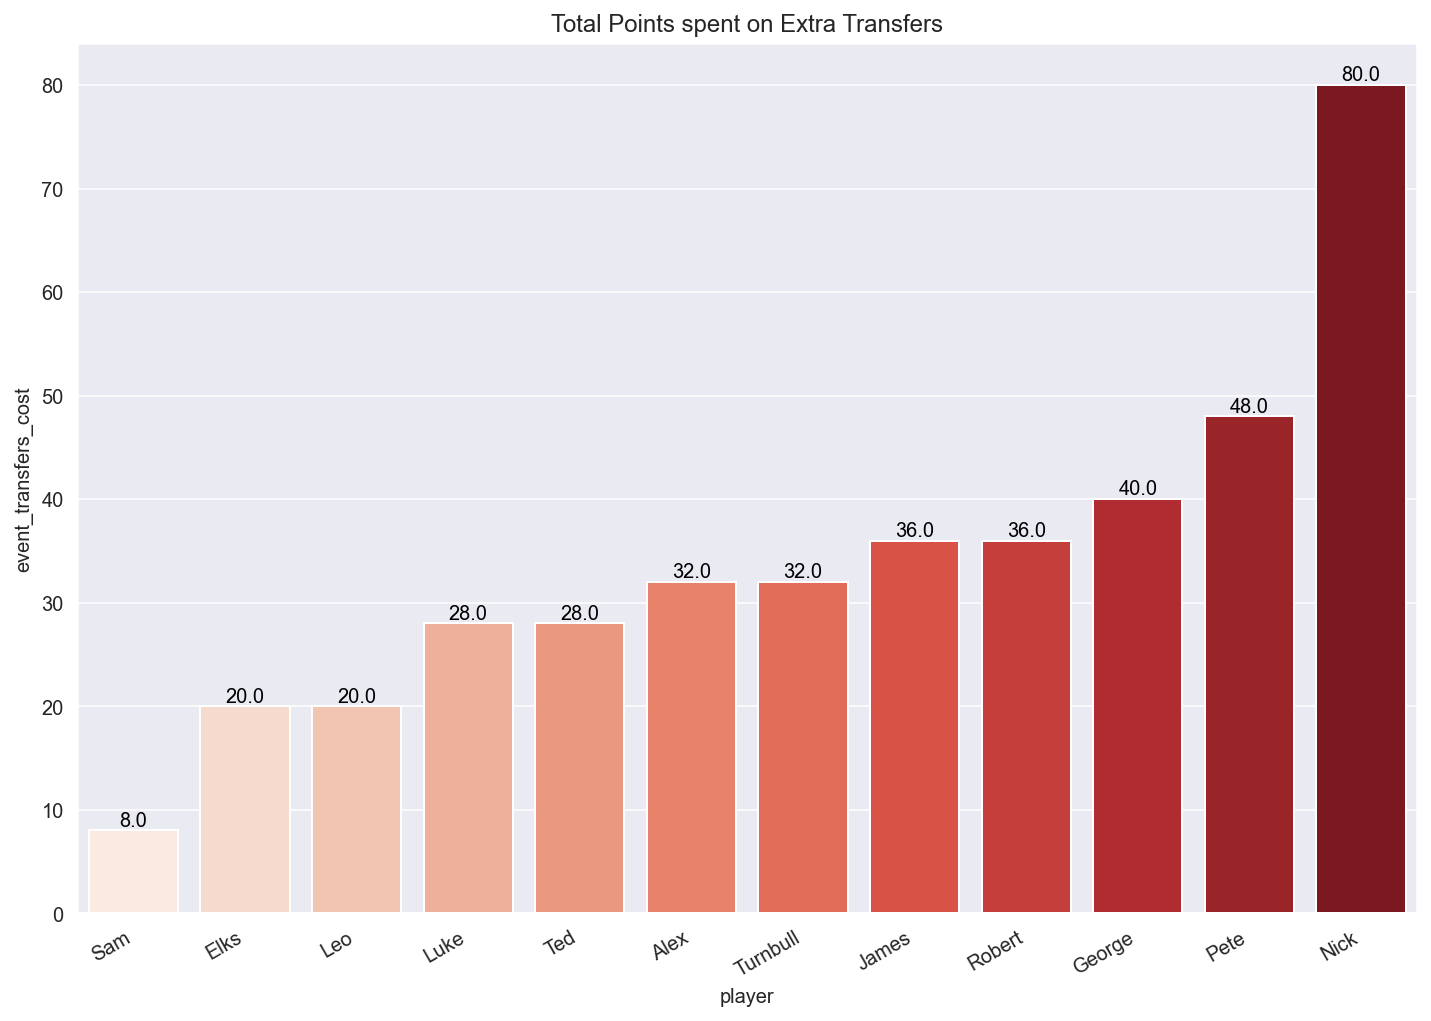

In [102]:
# Extra Transfers cost
df_temp = df_all.groupby('player').sum()[['event_transfers_cost']].sort_values('event_transfers_cost')
plt.figure(figsize=(12,8))
x_transfers = sns.barplot(y=df_temp.event_transfers_cost,x=df_temp.index,palette='Reds')
plt.title("Total Points spent on Extra Transfers")
plt.xticks(rotation=30,ha="right")
for p in x_transfers.patches:
    x_transfers.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

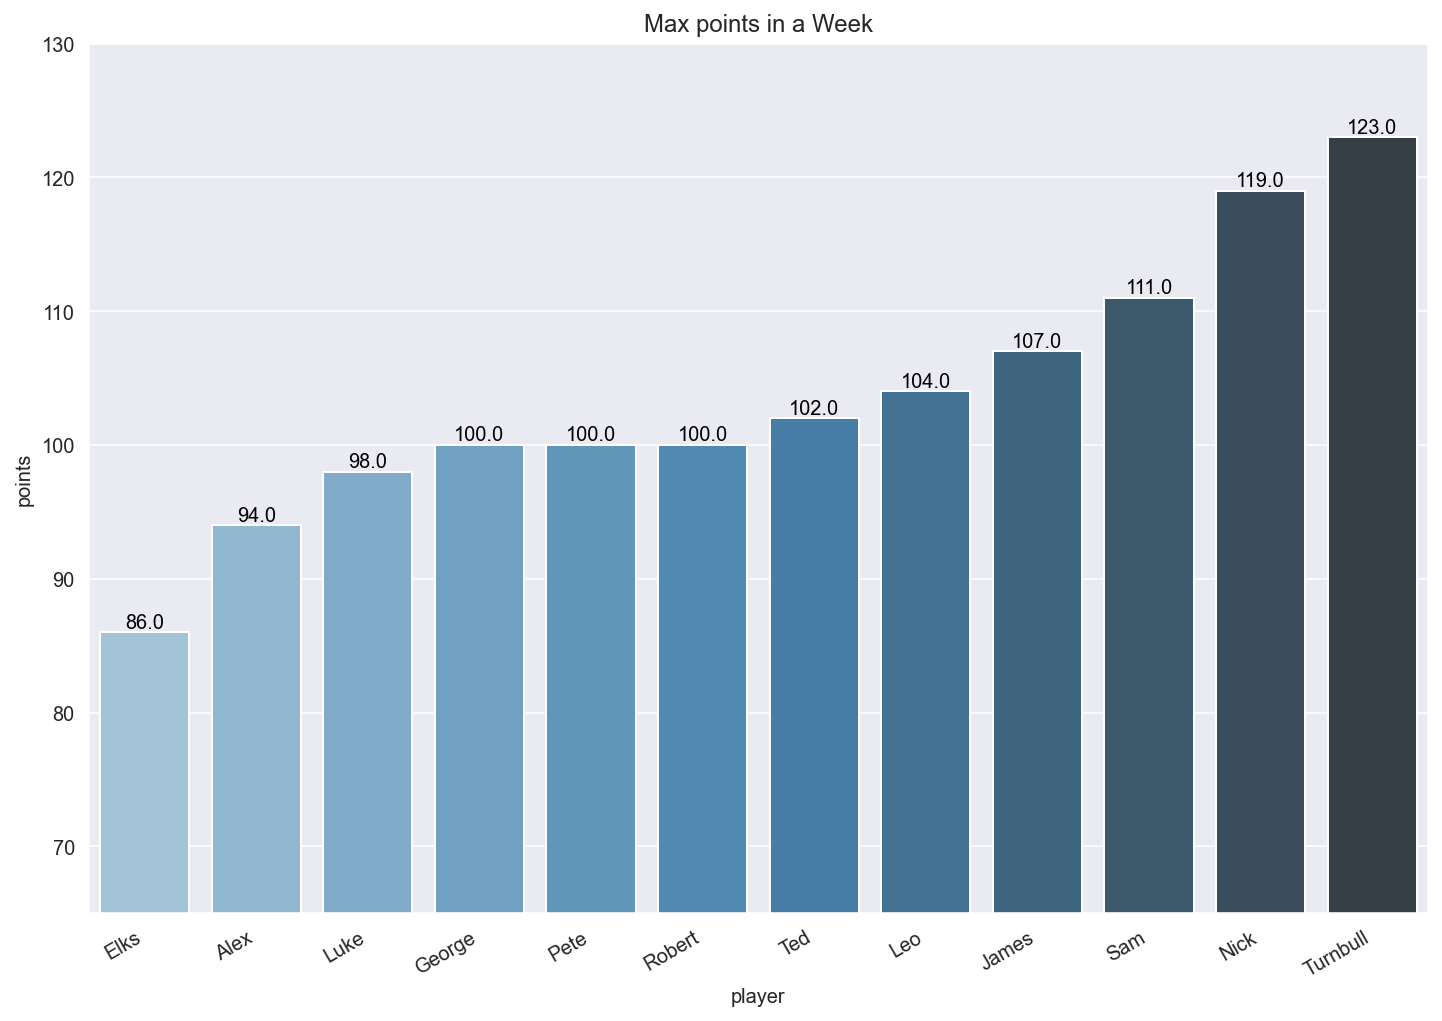

In [103]:
# Max points in a week
df_temp = df_all.groupby('player').max()[['points']].sort_values('points')
plt.figure(figsize=(12,8))
max_week = sns.barplot(y=df_temp.points,x=df_temp.index,palette='Blues_d')
plt.title("Max points in a Week")
plt.xticks(rotation=30,ha="right")
for p in max_week.patches:
    max_week.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.ylim(65,130)
plt.show()

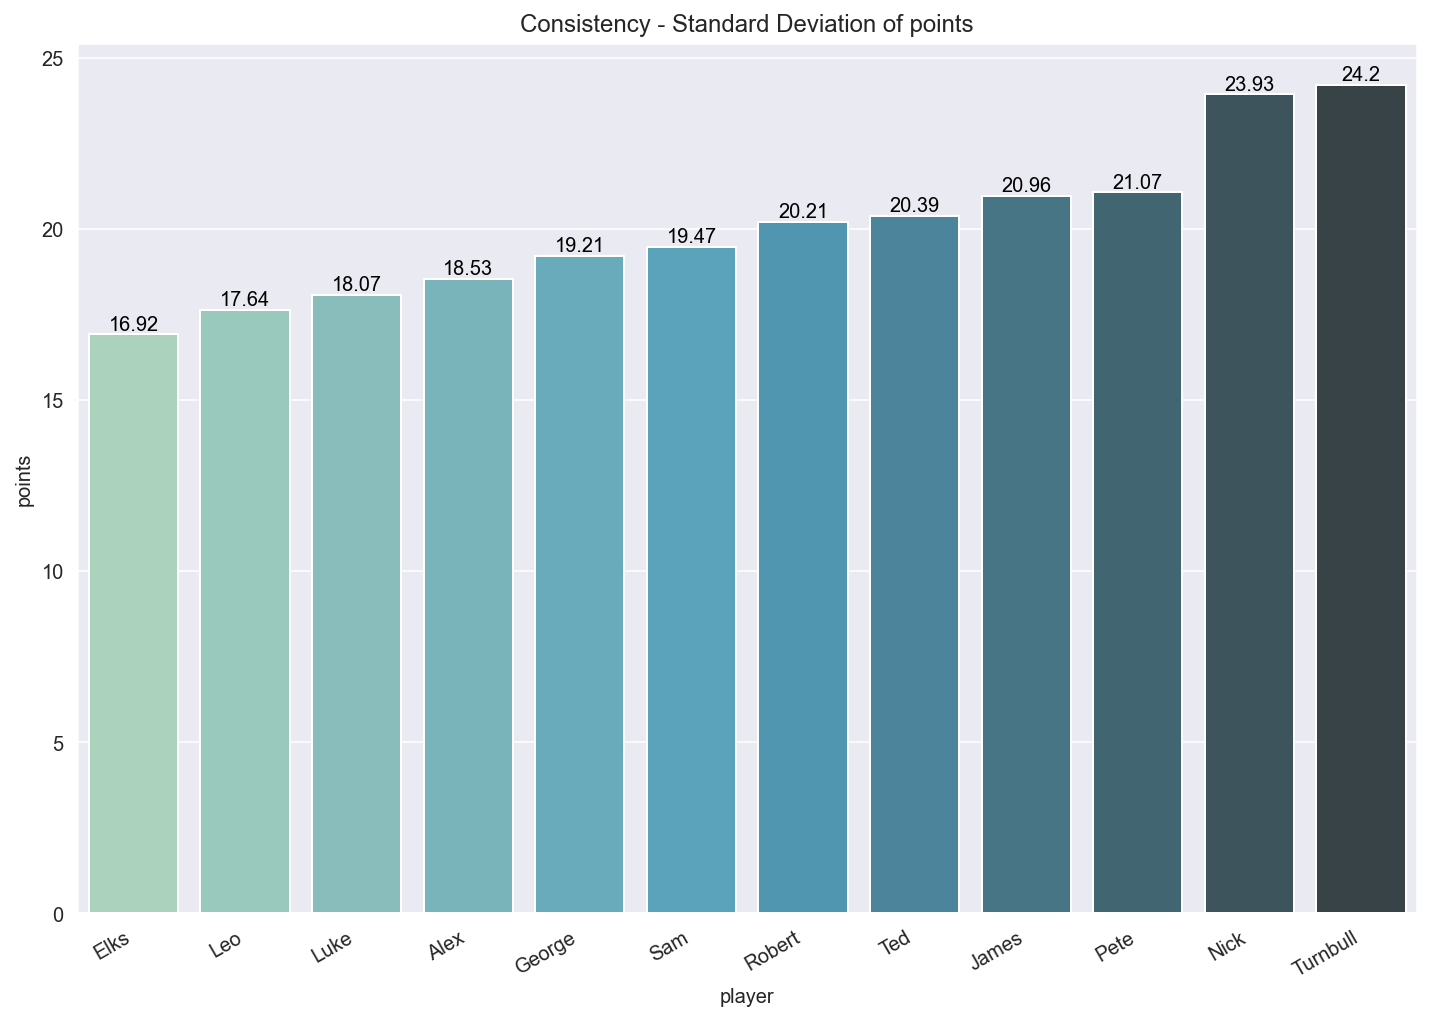

In [104]:
# Std dev points 
df_temp = df_all.groupby('player').std()[['points']].sort_values('points')
plt.figure(figsize=(12,8))
consistency=sns.barplot(y=df_temp.points,x=df_temp.index,palette="GnBu_d")
plt.title("Consistency - Standard Deviation of points")
plt.xticks(rotation=30,ha="right")
for p in consistency.patches:
    consistency.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

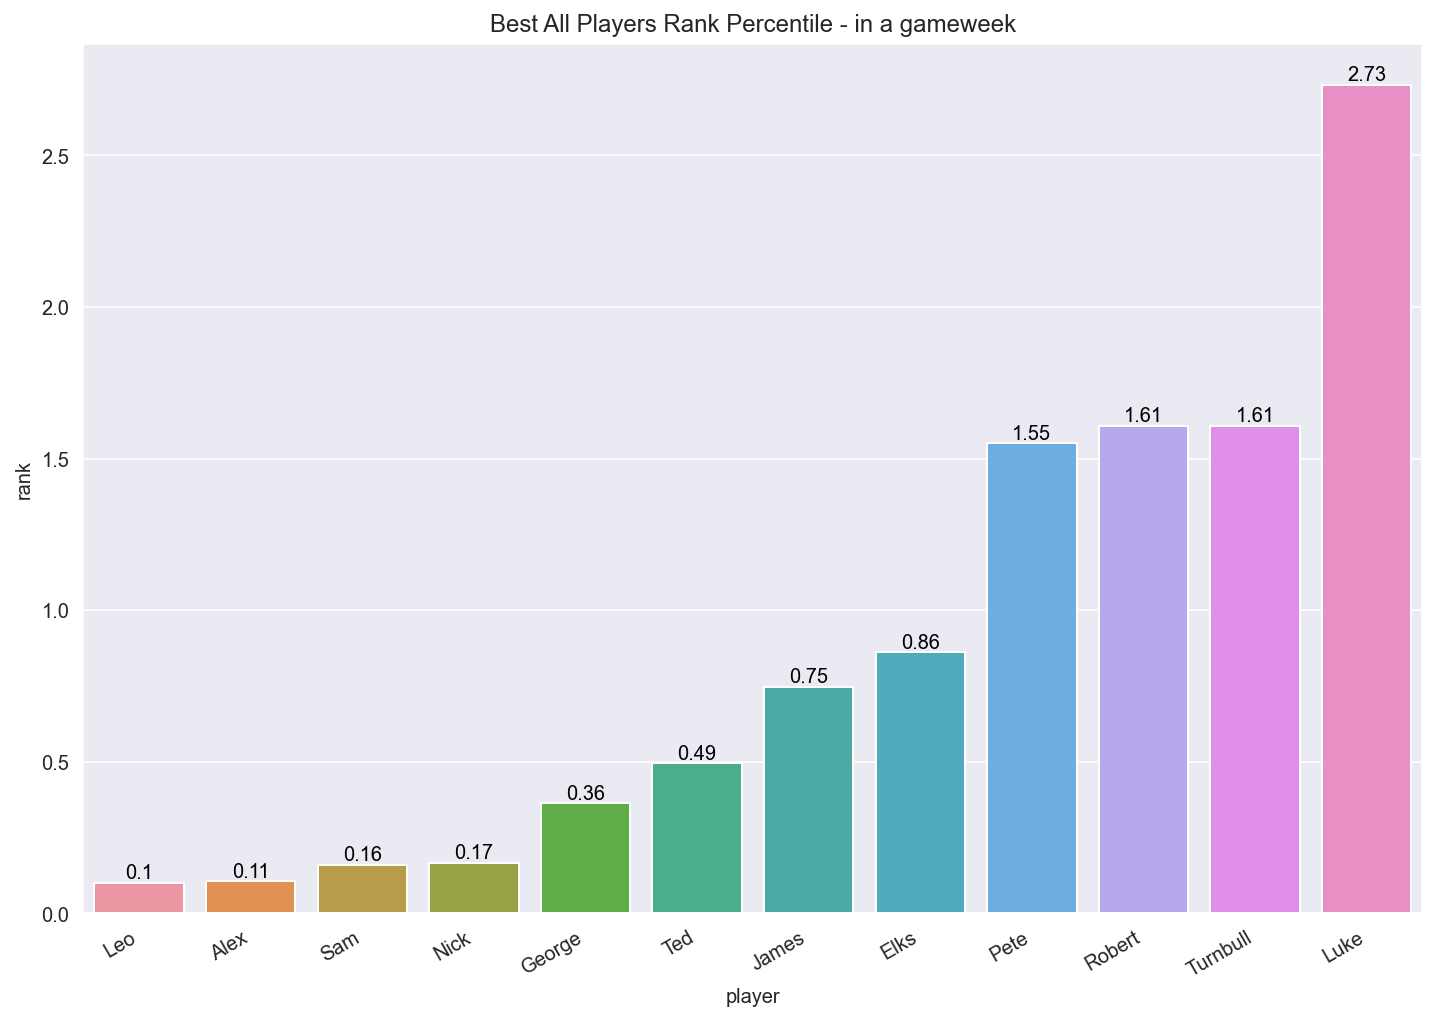

In [105]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').min()[['rank']].sort_values('rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart=sns.barplot(y=df_temp['rank'],x=df_temp.index)
plt.title("Best All Players Rank Percentile - in a gameweek")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

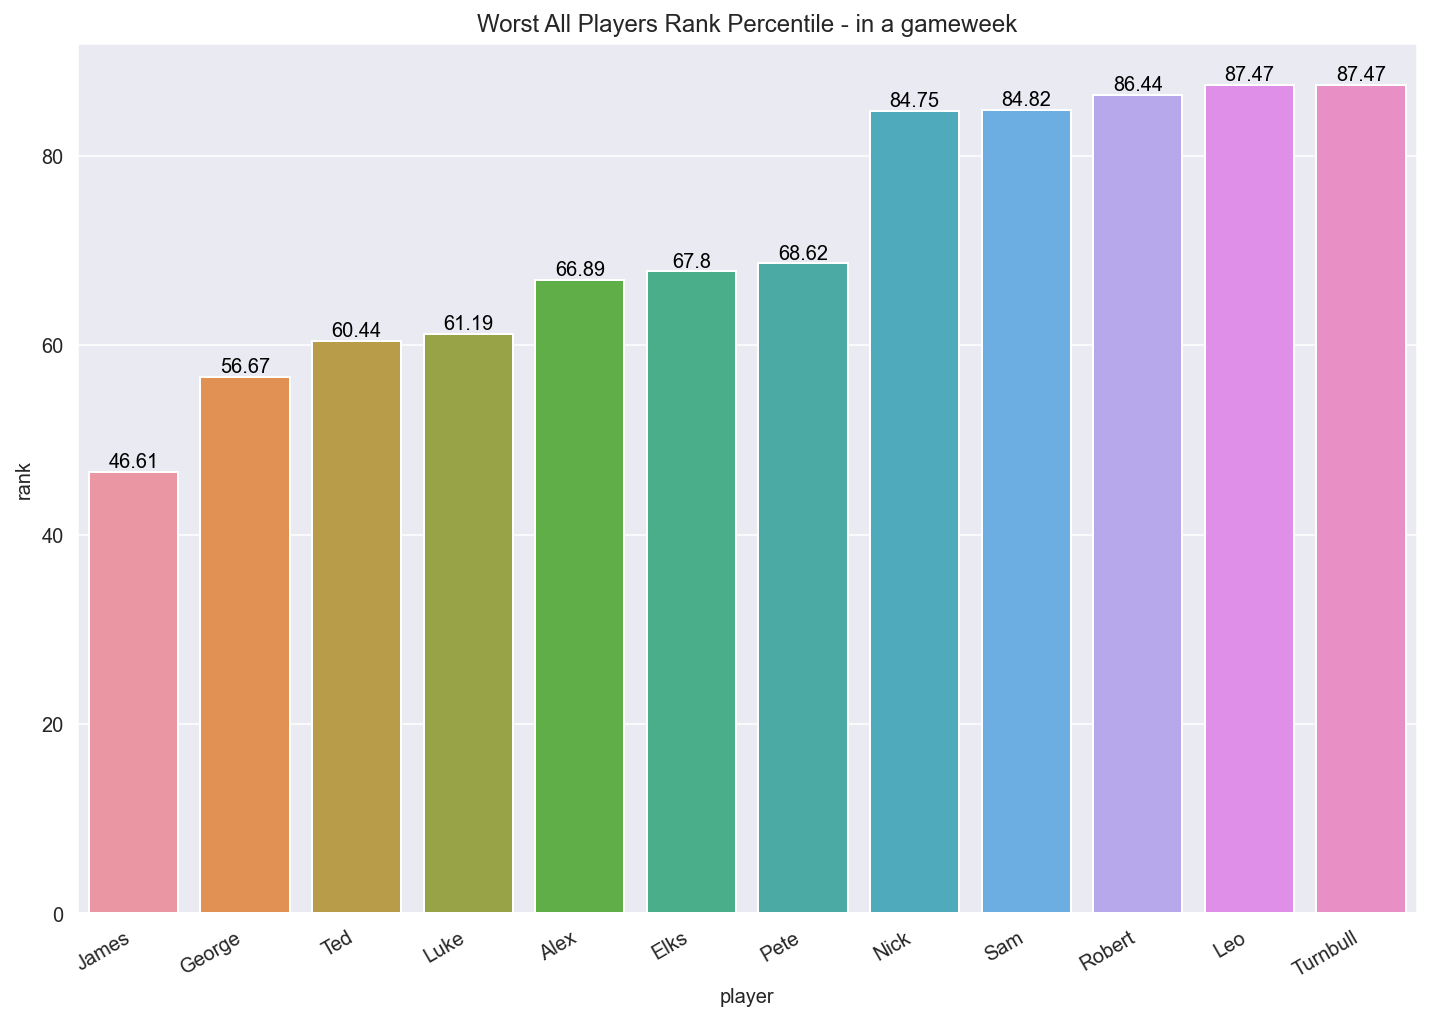

In [106]:
# Worst UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').max()[['rank']].sort_values('rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['rank'],x=df_temp.index)
plt.title("Worst All Players Rank Percentile - in a gameweek")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

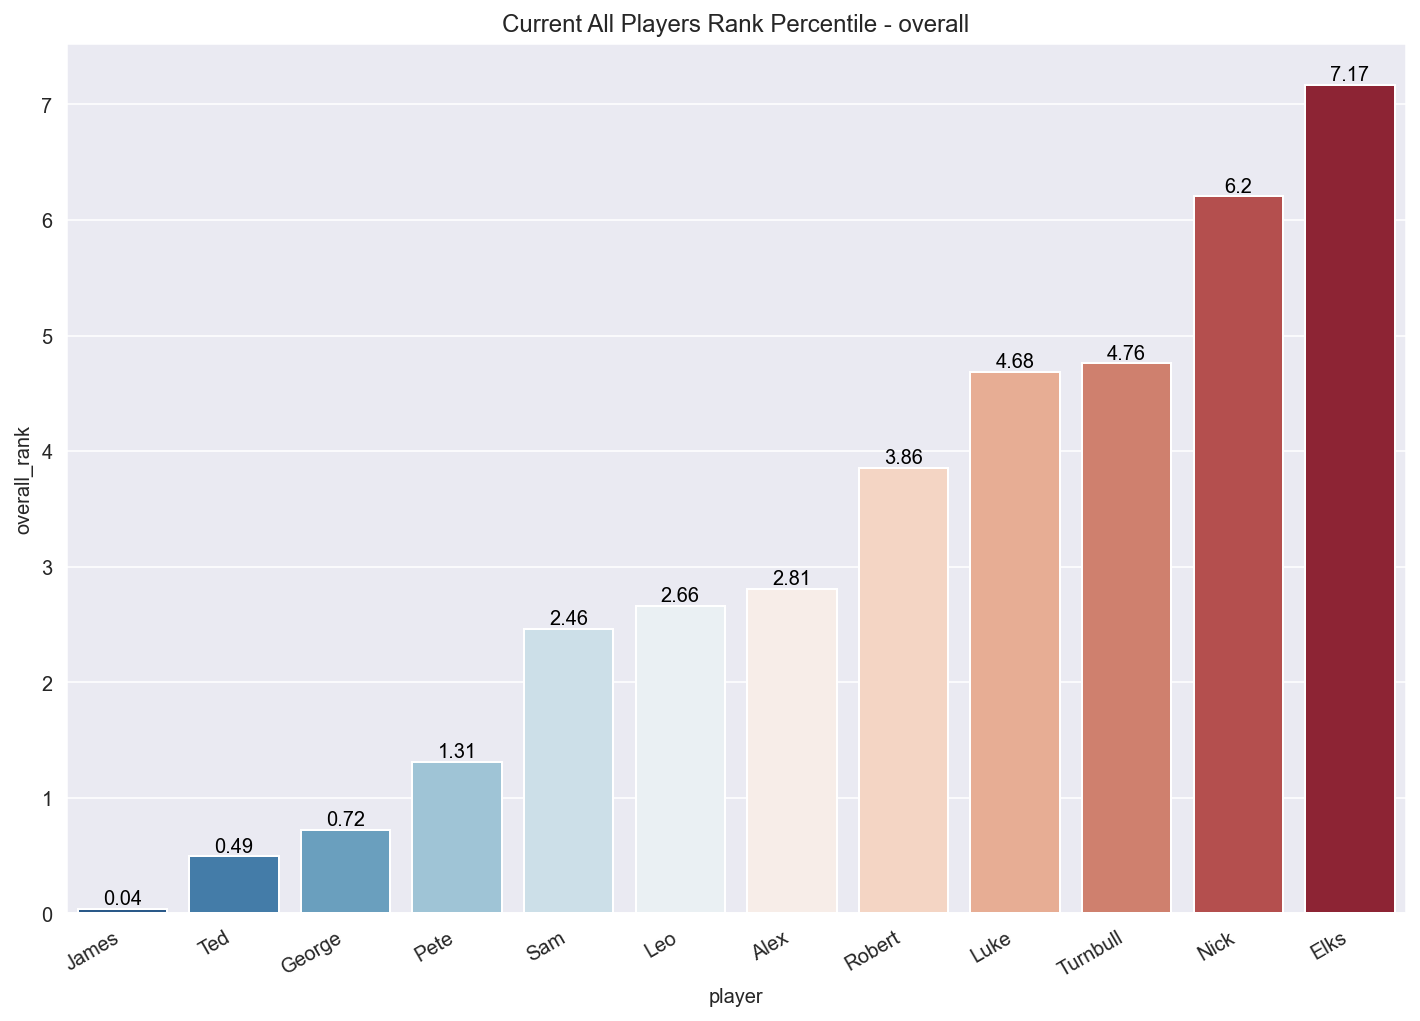

In [107]:
# Current all players rank
df_temp = df_all[df_all['event']==df_all['event'].max()][['overall_rank','player']].sort_values('overall_rank')
df_temp['overall_rank']=df_temp['overall_rank']/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
current_percentile = sns.barplot(y=df_temp['overall_rank'],x=df_temp.player, palette = "RdBu_r")
plt.title("Current All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in current_percentile.patches:
    current_percentile.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

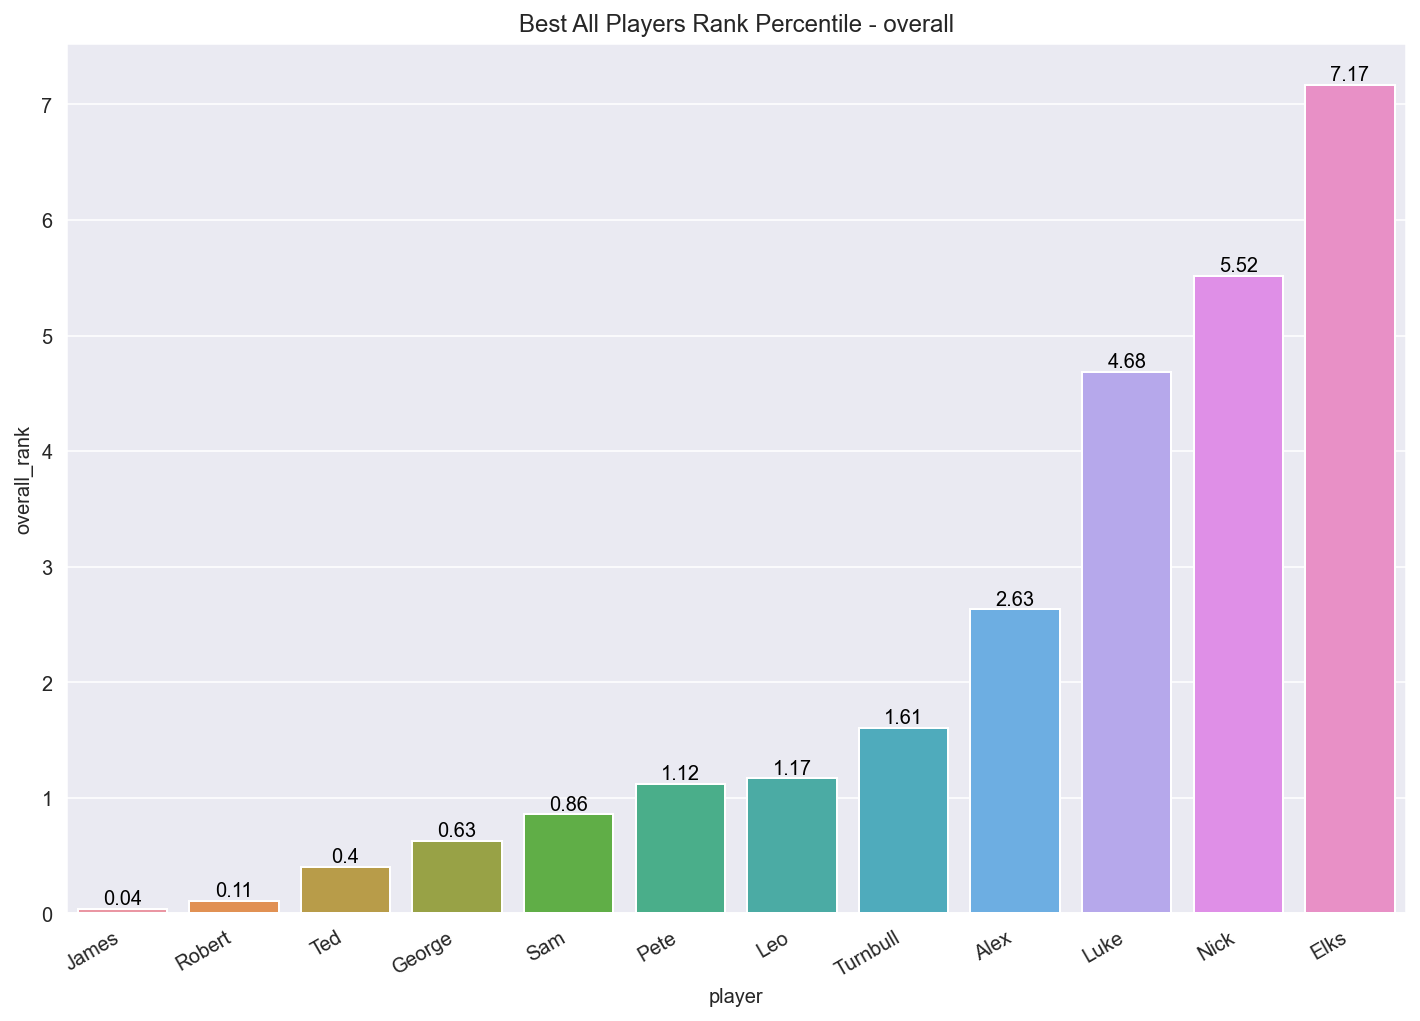

In [108]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').min()[['overall_rank']].sort_values('overall_rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['overall_rank'],x=df_temp.index)
plt.title("Best All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

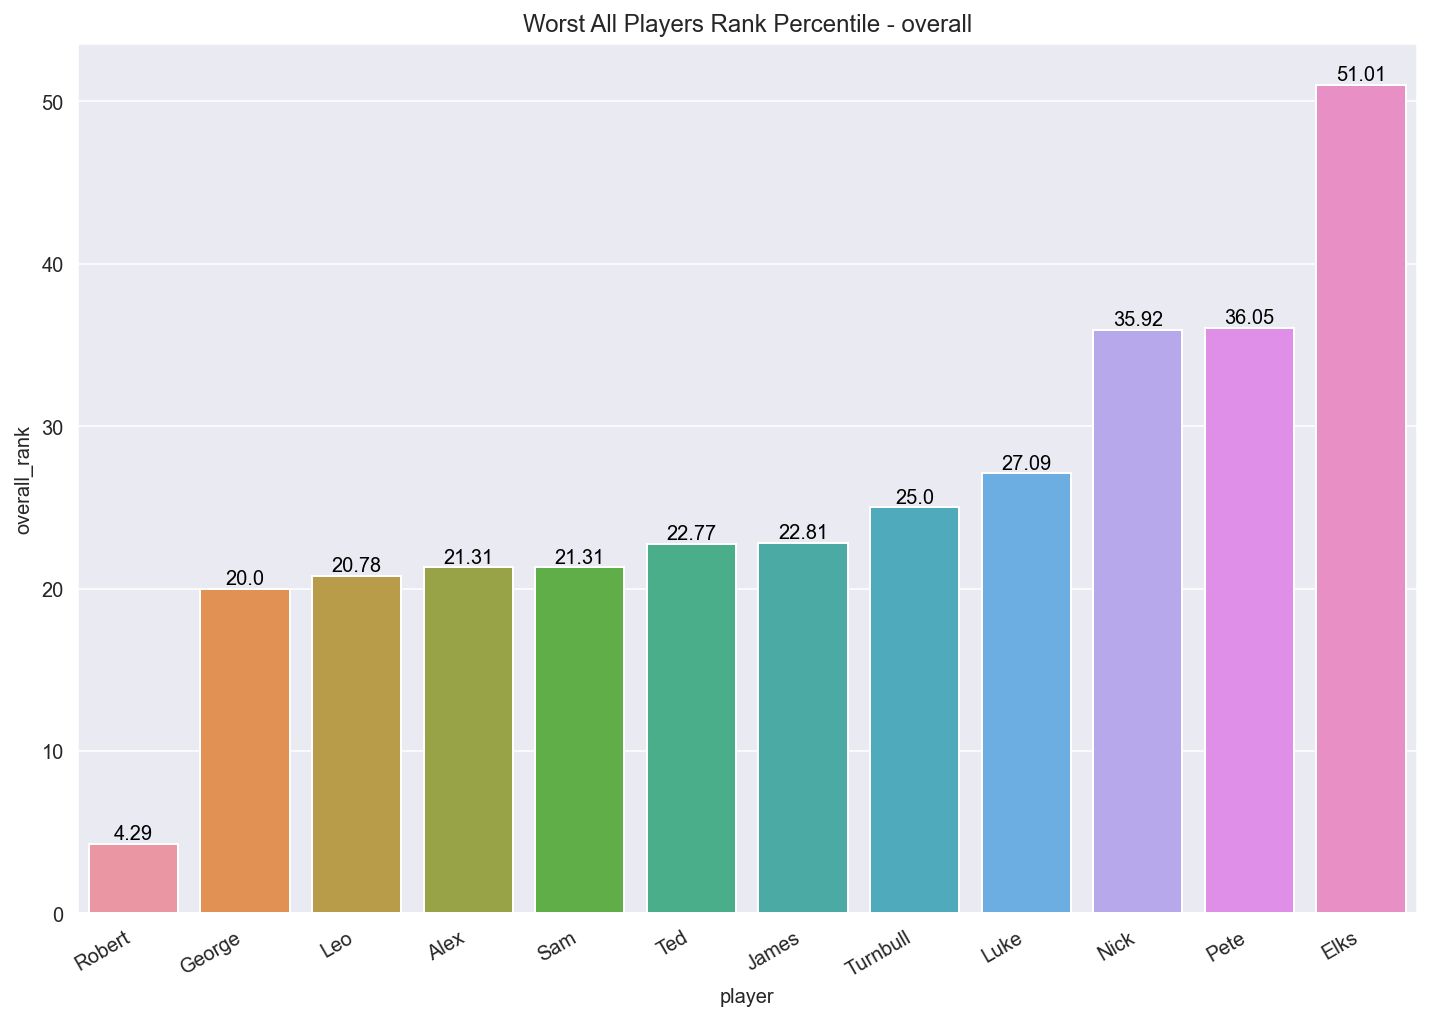

In [109]:
# Best UK Rank Percentile in a gameweek
df_temp = df_all.groupby('player').max()[['overall_rank']].sort_values('overall_rank')/int(json_data['total_players'])*100
plt.figure(figsize=(12,8))
chart = sns.barplot(y=df_temp['overall_rank'],x=df_temp.index)
plt.title("Worst All Players Rank Percentile - overall")
plt.xticks(rotation=30,ha="right")
for p in chart.patches:
    chart.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

In [110]:
df_all = df_all.sort_values(by='event')
rank_list = []
for e in df_all.event.unique():
    df_temp = df_all[df_all.event==e]
    rank_list+=df_temp.total_points.rank(method='min',ascending=False).tolist()

In [111]:
df_all['rankpw']=rank_list

In [112]:
df_all

,event,points,total_points,rank,rank_sort,overall_rank,bank,value,event_transfers,event_transfers_cost,points_on_bench,player,team_name,rankpw
0,1.0,68.0,68.0,984401.0,1000221.0,984401.0,5.0,1000.0,0.0,0.0,2.0,James,Balsamic Vinagre,9.0
0,1.0,86.0,86.0,131343.0,131508.0,131343.0,5.0,1000.0,0.0,0.0,4.0,Turnbull,Turnbull’s Revenge,1.0
0,1.0,76.0,76.0,475144.0,511837.0,475144.0,0.0,1000.0,0.0,0.0,9.0,Leo,OrigiASM,4.0
0,1.0,68.0,68.0,984401.0,1007263.0,984401.0,0.0,1000.0,0.0,0.0,1.0,Pete,Diego Marrastebbo,9.0
0,1.0,59.0,59.0,1737686.0,1769714.0,1737686.0,0.0,1000.0,0.0,0.0,1.0,Nick,Fiddler on the Huth,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,31.0,0.0,1938.0,2413204.0,4086246.0,59108.0,2.0,1057.0,0.0,0.0,0.0,George,Warnocked Out,3.0
30,31.0,0.0,1952.0,2413204.0,2496998.0,40271.0,2.0,1024.0,0.0,0.0,0.0,Ted,Grabban by Debuchy,2.0
30,31.0,0.0,2024.0,2413204.0,2797999.0,3311.0,4.0,1049.0,0.0,0.0,6.0,James,Balsamic Vinagre,1.0
30,31.0,1.0,1822.0,2251127.0,2272388.0,507091.0,0.0,1023.0,1.0,0.0,0.0,Nick,Fiddler on the Huth,11.0


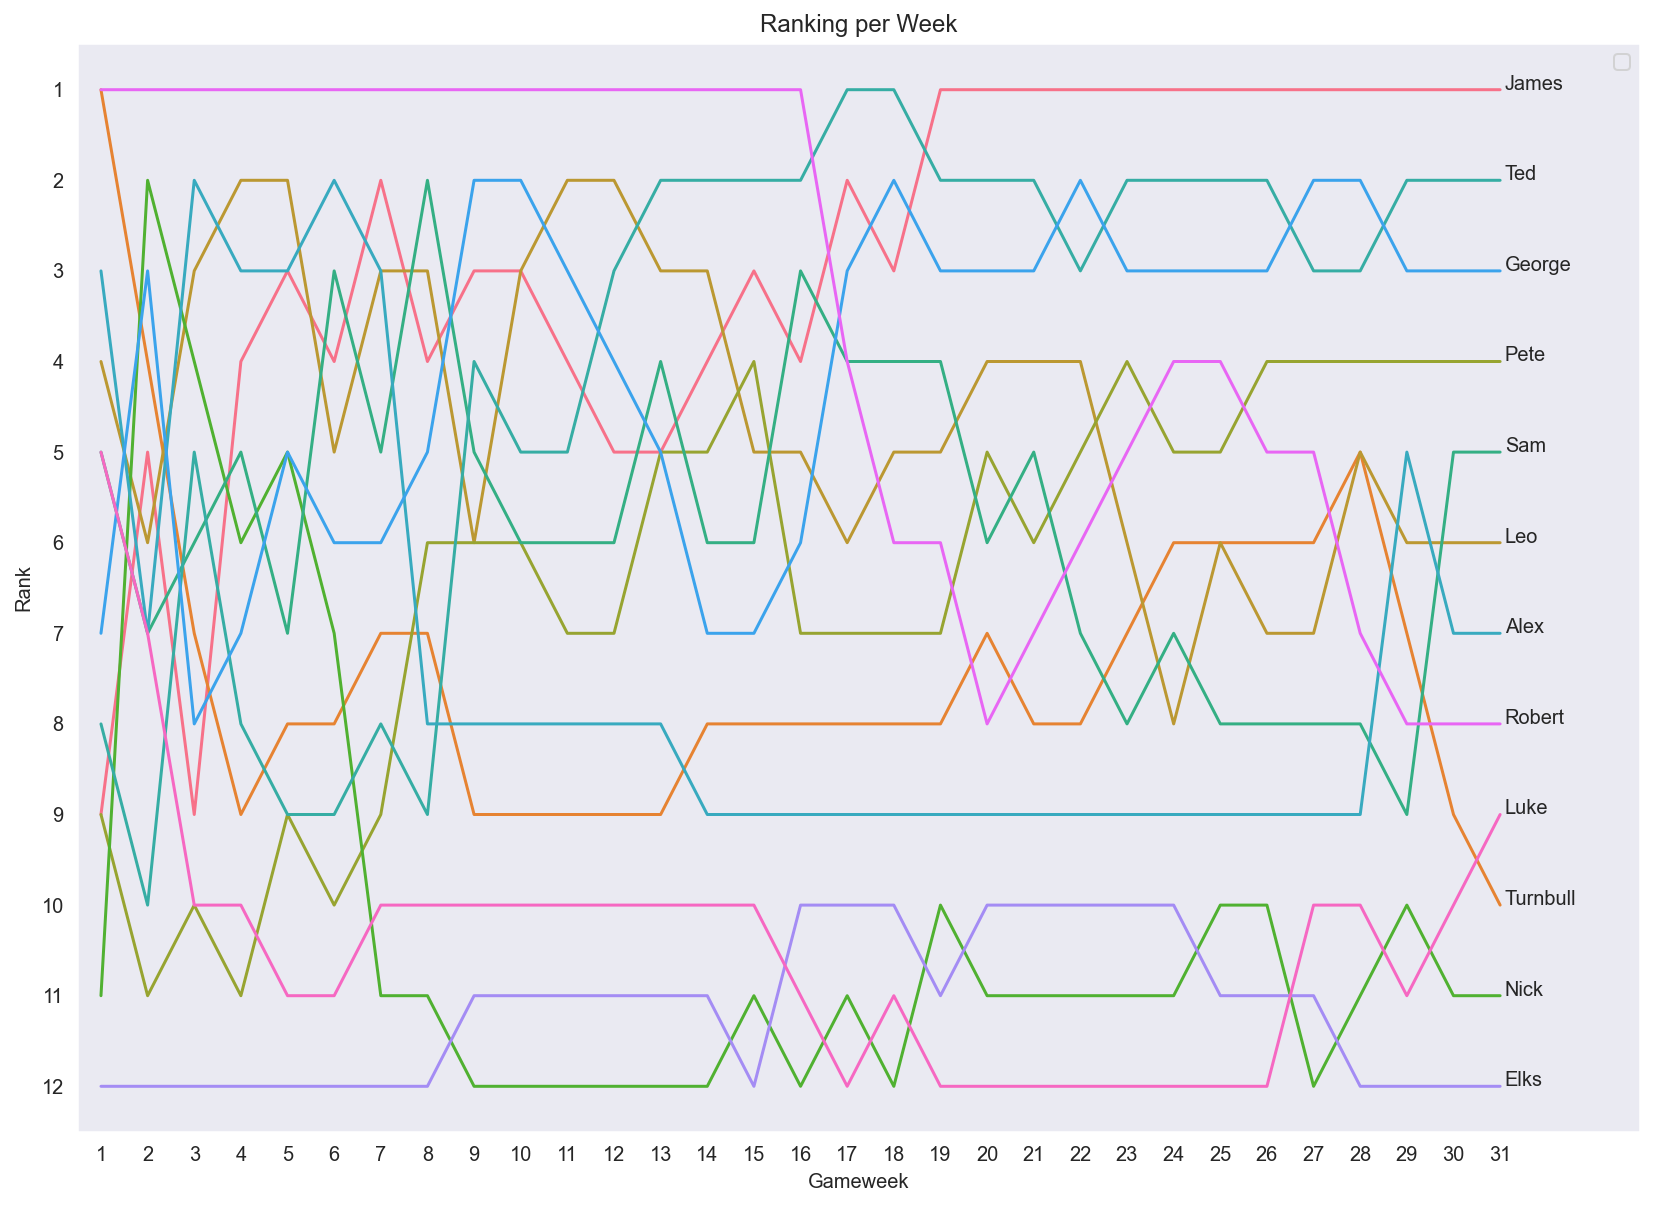

In [113]:
gw = int(df_all.event.max())
curr_rank_list = df_all[df_all.event==gw].sort_values("total_points",ascending=False)["player"].tolist()
sns.set_style('dark')
plt.figure(figsize=(14,10))
ranking=sns.lineplot(y=df_all.rankpw,x=df_all.event,hue=df_all.player)
for i, name in enumerate(curr_rank_list):
    ranking.annotate(name,(gw+0.1,i+1))
plt.yticks(range(1,13))
plt.xticks(range(1,gw+1))
plt.xlim(0.5,gw+3)
plt.ylim(12.5,0.5)
plt.title("Ranking per Week")
plt.xlabel("Gameweek")
plt.ylabel("Rank")
plt.legend("")
plt.show()

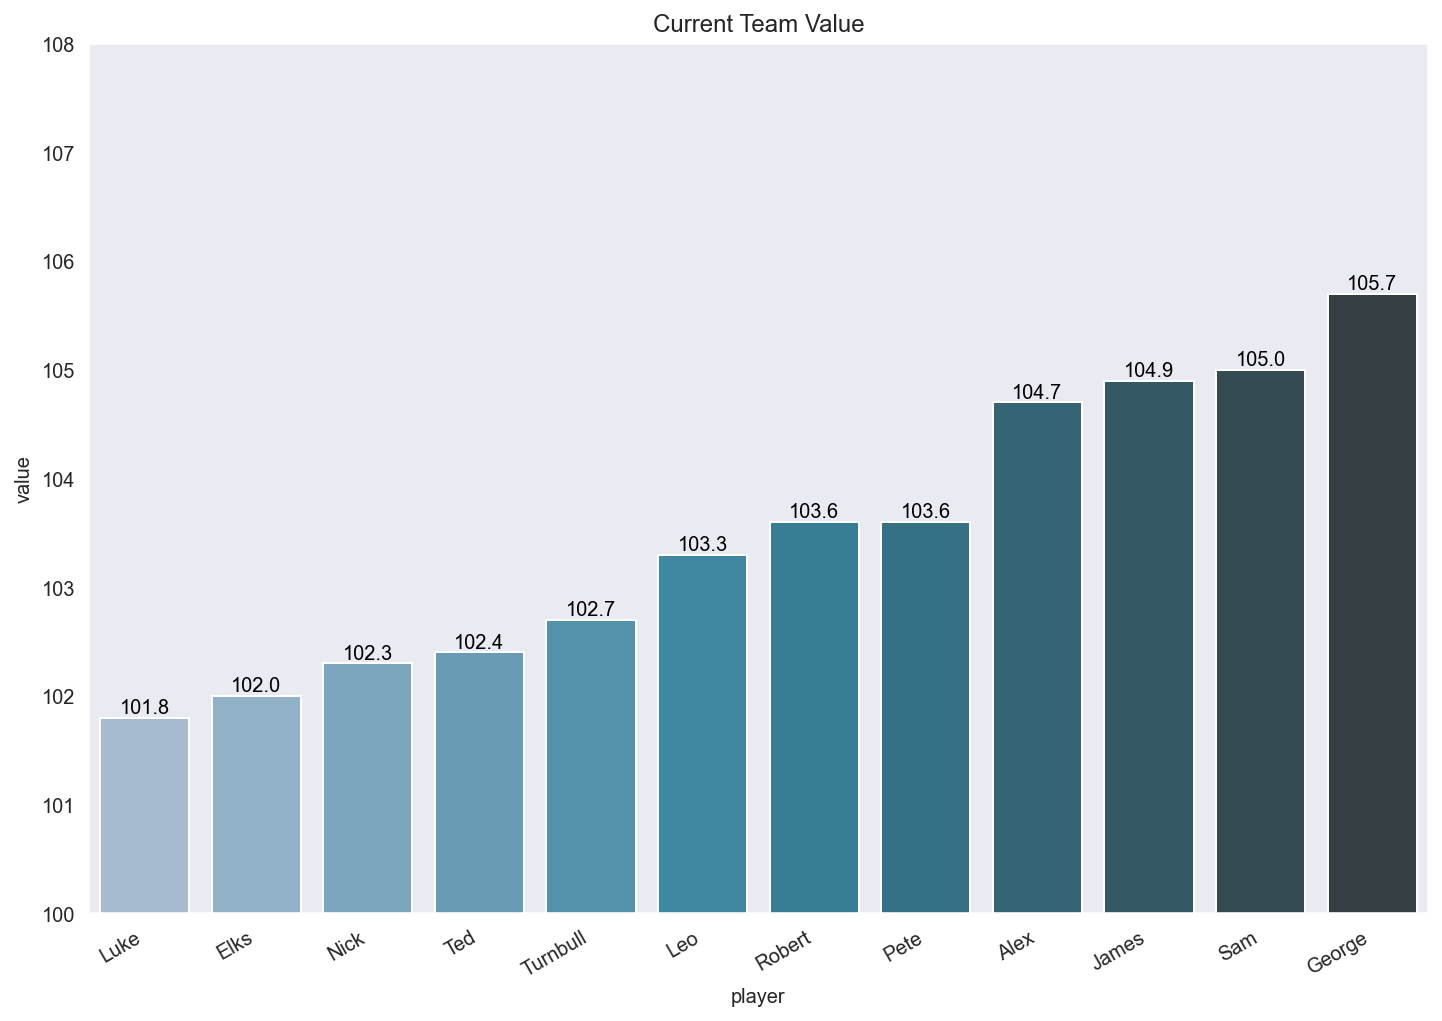

In [114]:
# Current team value
df_temp = df_all[df_all['event']==df_all['event'].max()][['value','bank','player']].sort_values('value')
# df_temp['']
plt.figure(figsize=(12,8))
team_value = sns.barplot(y=df_temp['value']/10,x=df_temp.player,palette='PuBuGn_d')
plt.title("Current Team Value")
plt.xticks(rotation=30,ha="right")
for p in team_value.patches:
    team_value.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.ylim(100,108)
plt.show()

## Looking at ownership

In [115]:
#Formatting names
df_league['player'] = df_league['player_name'].apply(lambda x: "Alex Andreou" if x == "A A" else x)
df_league['player'] = df_league['player'].apply(lambda x: "Turnbull" if x == "Henry Turnbull" else x)
df_league['player'] = df_league['player'].apply(lambda x: "Elks" if x == "Henry Elks" else x)
df_league['player'] = df_league['player'].apply(lambda x: x.split()[0])

In [116]:
#Looping through and creating a df of the leagues picks
for row in df_league.index:
    url = "https://fantasy.premierleague.com/api/entry/{}/event/{}/picks/".format(df_league.iloc[row,7],gw)
    r = requests.get(url)
    picks = r.json()
    if row == 0:
        df_picks = pd.DataFrame(picks['picks'])
        df_picks['player'] = df_league.iloc[row,-1]
    else:
        df_temp = pd.DataFrame(picks['picks'])
        df_temp['player'] = df_league.iloc[row,-1]
        df_picks = pd.concat([df_picks,df_temp])

In [117]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json_data = r.json()
player_df = pd.DataFrame(json_data['elements'])
teams_df = pd.DataFrame(json_data['teams'])
player_df.team = player_df.team.map(pd.Series(teams_df.name.values,teams_df.id).to_dict())

In [118]:
df_picks['web_name'] = df_picks.element.map(pd.Series(player_df.web_name.values,player_df.id).to_dict())
df_picks['team']=df_picks.element.map(pd.Series(player_df.team.values,player_df.id).to_dict())

In [119]:
df_picks.head()

,element,position,multiplier,is_captain,is_vice_captain,player,web_name,team
0,548,1,1,False,False,James,Mendy,Chelsea
1,109,2,1,False,False,James,Rüdiger,Chelsea
2,556,3,1,False,False,James,Dias,Man City
3,259,4,1,False,False,James,Alexander-Arnold,Liverpool
4,390,5,1,False,False,James,Son,Spurs


In [120]:
df_EO = df_picks.groupby(["web_name","team"])[['multiplier']].sum()/len(df_league.index)*100
df_EO = df_EO.reset_index()
df_EO = df_EO[df_EO.multiplier>1/len(df_league.index)*100]
df_EO = df_EO.sort_values(by='multiplier',ascending=False)

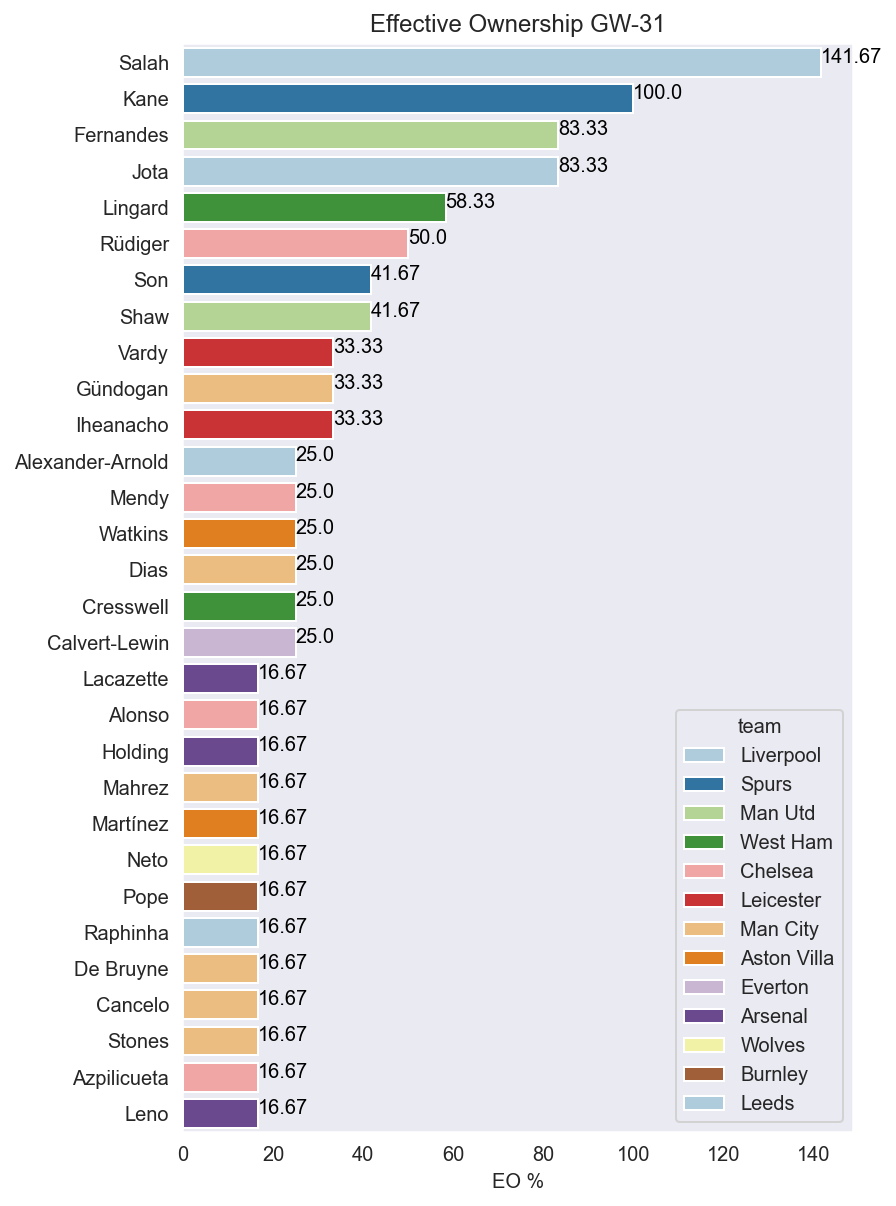

In [121]:
plt.figure(figsize=(6,10))
EO_plot = sns.barplot(y=df_EO.web_name,x=df_EO.multiplier,hue=df_EO.team,dodge=False,palette='Paired')
plt.title("Effective Ownership GW-{}".format(gw))
plt.xlabel("EO %")
plt.ylabel("")
for p in EO_plot.patches:
    EO_plot.annotate(round(p.get_width(),2), (p.get_width(),p.get_y()+p.get_height()/1.5),
     ha='left', va='center', fontsize=10, color='black', xytext=(0, 5),
     textcoords='offset points')
plt.show()

In [122]:
df_picks[df_picks.web_name == "Salah"]

,element,position,multiplier,is_captain,is_vice_captain,player,web_name,team
8,254,9,2,True,False,James,Salah,Liverpool
8,254,9,2,True,False,Ted,Salah,Liverpool
7,254,8,2,True,False,George,Salah,Liverpool
6,254,7,2,True,False,Sam,Salah,Liverpool
8,254,9,2,True,False,Robert,Salah,Liverpool
6,254,7,1,False,True,Luke,Salah,Liverpool
4,254,5,2,True,False,Turnbull,Salah,Liverpool
6,254,7,2,True,False,Nick,Salah,Liverpool
6,254,7,2,True,False,Elks,Salah,Liverpool


In [123]:
# Cheeky differentials
df_diff = df_picks.groupby(["web_name"])[['multiplier']].sum()
df_diff = df_diff[df_diff.multiplier==1]
df_diff = df_diff.reset_index()
df_diff['player'] = df_diff.web_name.map(pd.Series(df_picks[df_picks.multiplier!=0].player.values,df_picks[df_picks.multiplier!=0].web_name).to_dict())
df_diff.drop('multiplier',inplace=True,axis=1)
df_diff.columns = ["Rogue Choice", "Manager"]
df_diff = df_diff.sort_values('Manager')
df_diff = df_diff.set_index('Manager')

In [124]:
df_diff

,Rogue Choice
Manager,
Alex,Jorginho
Alex,Sánchez
Elks,Coady
Elks,Phillips
James,Mount
Luke,Dunk
Luke,Keane
Luke,Patrício
Nick,Holgate


In [125]:
player_df

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,0.0,0.0,37605,0,0,-3,3,0,3,0.0,...,688,280,688,280,NaN,,NaN,,NaN,
1,0.0,0.0,39476,0,0,-2,2,0,2,0.0,...,635,230,655,232,NaN,,NaN,,NaN,
2,0.0,0.0,41270,0,0,-1,1,0,2,0.0,...,221,62,283,94,NaN,,4.0,,NaN,
3,100.0,100.0,54694,0,0,-6,6,2,3,1.5,...,30,16,46,28,NaN,,NaN,,1.0,
4,100.0,100.0,58822,0,0,-4,4,0,2,1.0,...,303,100,328,116,NaN,,5.0,,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,NaN,NaN,448487,0,0,0,0,0,1,0.5,...,491,28,546,61,NaN,,NaN,,NaN,
684,0.0,0.0,209353,0,0,-1,1,0,4,0.0,...,421,65,493,67,NaN,,NaN,,NaN,
685,NaN,NaN,465551,0,0,0,0,0,2,0.5,...,495,197,550,209,NaN,,NaN,,NaN,
686,100.0,100.0,73314,0,0,-2,2,0,4,2.5,...,175,46,301,43,NaN,,NaN,,NaN,


In [126]:
# Captaining error

#LoopThrough league managers

    #Loop through gws
        #Loop through active players
url = "https://fantasy.premierleague.com/api/entry/1409005/event/28/picks/"
r = requests.get(url)
picks = r.json()
df_temp3 = pd.DataFrame(picks['picks']) 
df_temp3
# for player in df_temp3.element:
# load player history - link to fixtures to find gw and then look back up in player history
#compare all multiplier 1 to multiplier 2 - if no multiplier 2 then max


,element,position,multiplier,is_captain,is_vice_captain
0,417,1,1,False,False
1,277,2,1,False,False
2,155,3,1,False,False
3,376,4,1,False,False
4,200,5,1,False,False
5,370,6,1,False,False
6,390,7,1,False,False
7,302,8,1,False,False
8,202,9,1,False,False
9,514,10,1,False,False


In [127]:
url = "https://fantasy.premierleague.com/api/element-summary/273/"
r = requests.get(url)
json_data = r.json()
pd.DataFrame(json_data['history'])

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
0,273,18,20,2,False,2020-09-21T19:15:00Z,1,3,2,90,...,14,20.2,0.3,0.0,2.1,50,-502,28676,2022,2524
1,273,24,9,0,True,2020-09-27T15:30:00Z,2,5,3,0,...,0,0.0,0.0,0.0,0.0,50,7191,42615,12556,5365
2,273,33,10,0,False,2020-10-03T16:30:00Z,1,1,4,0,...,0,0.0,0.0,0.0,0.0,50,-5411,38156,2200,7611
3,273,44,1,0,True,2020-10-17T16:30:00Z,1,0,5,0,...,0,0.0,0.0,0.0,0.0,50,-5594,34380,1052,6646
4,273,57,19,0,False,2020-10-24T11:30:00Z,1,1,6,0,...,0,0.0,0.0,0.0,0.0,49,-2587,32933,1244,3831
5,273,66,15,0,False,2020-10-31T12:30:00Z,0,1,7,0,...,0,0.0,0.0,0.0,0.0,49,-2334,31388,842,3176
6,273,75,11,0,True,2020-11-08T16:30:00Z,1,1,8,0,...,0,0.0,0.0,0.0,0.0,49,-2075,29738,611,2686
7,273,87,17,0,False,2020-11-21T17:30:00Z,2,0,9,0,...,0,0.0,0.0,0.0,0.0,48,-1243,29191,640,1883
8,273,95,4,6,True,2020-11-28T15:00:00Z,5,0,10,90,...,30,29.6,11.9,8.0,5.0,48,-536,29101,695,1231
9,273,104,8,6,True,2020-12-05T15:00:00Z,2,0,11,90,...,26,21.4,2.4,0.0,2.4,48,5046,35643,6245,1199


In [128]:
df_league

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name,player
0,23277357,0,James Rivers,1,1,1,2024,1065573,Balsamic Vinagre,James
1,36423051,0,Ted Rosner,2,2,2,1952,260799,Grabban by Debuchy,Ted
2,38810568,0,George Baker Baker,3,3,3,1938,3962148,Warnocked Out,George
3,23483387,2,Pete Stebbing,4,4,4,1913,1591768,Diego Marrastebbo,Pete
4,25060316,0,Sam Guest,5,5,5,1881,4032730,lads lads lads,Sam
5,24183778,0,Leo Anthias,6,6,6,1877,3962240,OrigiASM,Leo
6,38295560,0,A A,7,7,7,1874,4914782,Nanas Squad,Alex
7,30449535,7,Robert Shannon,8,8,8,1855,4811871,Abbeville Rovers,Robert
8,23258833,9,Luke Betham,9,10,9,1842,1409005,Nanas Squad,Luke
9,28025617,0,Henry Turnbull,10,9,10,1841,16866,Turnbull’s Revenge,Turnbull


In [129]:
## Publishing to datapane

In [130]:
dp.login(token="091830a120b8c1f1cde36fd23c9e06d4b81bfc6b")
r = dp.Report(
    f'### LukeStepsUp FPL League',
    f'Graphing the most important league in FPL',
    dp.Plot(ranking),
    dp.Plot(EO_plot,responsive=False),
    '#### Cheeky differentials GW-{}'.format(gw),
    dp.Table(df_diff),
    dp.Plot(bench_chart),
    dp.Plot(x_transfers),
    dp.Plot(max_week),
    dp.Plot(consistency),
    dp.Plot(current_percentile),
    dp.Plot(team_value)
)

Connected successfully to https://datapane.com as lukebetham


In [131]:
dp.login(token="091830a120b8c1f1cde36fd23c9e06d4b81bfc6b")
data = dp.Report(
    f'### LukeStepsUp FPL League - data',
    dp.DataTable(df_all)
)

Connected successfully to https://datapane.com as lukebetham


In [132]:
r.publish(name=f'FPL League Rankings', open=True, description=f'')

Publishing report and associated data - please wait..


ReadTimeout: HTTPSConnectionPool(host='datapane.com', port=443): Read timed out. (read timeout=54)

In [ ]:
data.publish(name=f'LukeStepsUp Data', open=True, description=f'')

In [ ]:
df_all[df_all.event==1].total_points.rank(method='min',ascending=False)

In [ ]:
df_all[df_all['event']==14]